In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## PGFs in NumPy ##

Recall our algorithm to find the distribution of $S_n$, the sum of $n$ i.i.d. copies of a random variable $X_1$ that has values in a finite set of non-negative integers.

- Start with the pgf of $X_1$.
- Raise it to the power $n$. That's the pgf of $S_n$.
- Read the distribution of $S_n$ off the pgf.

In this section we will use `NumPy` to carry out this algorithm.

Let's start with an example. Suppose the distribution of $X_1$ is given by $p_0 = 0.1$, $p_1 = 0.5$, $p_2 = 0.4$. Let `probs_X1` be an array containing the probabilities of the values 0, 1, and 2.

In [2]:
probs_X1 = make_array(0.1, 0.5, 0.4)

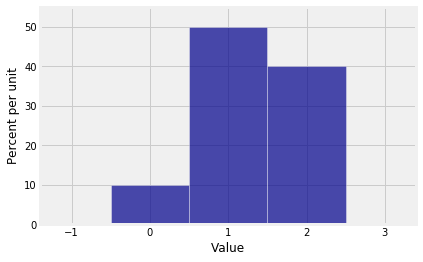

In [3]:
dist_X1 = Table().values(np.arange(3)).probability(probs_X1)
Plot(dist_X1)

The pgf of $X_1$ is
$$
0.1 + 0.5s + 0.4s^2
$$

`NumPy` expresses this polynomial in the standard mathematical way, leading with the term of the highest degree:

$$
0.4s^2 + 0.5s + 0.1
$$

The method `np.flipud` reverses the array of probabilities to be consistent with this order of coefficients. The `ud` in the name is for "up down". `NumPy` is thinking of the array as a column.

In [4]:
coeffs_X1 = np.flipud(probs_X1)
coeffs_X1

array([0.4, 0.5, 0.1])

The method `np.poly1d` takes the array of coefficients as its argument and constructs the polynomial. The `1d` in the name stands for "one dimensional".

In [6]:
pgf_X1 = np.poly1d(coeffs_X1)
print(pgf_X1)

     2
0.4 x + 0.5 x + 0.1


The call to `print` displays the polynomial in retro typewriter style, using $x$ where we have been using $s$. Keep in mind that the final term is the coefficient of $x^0$.

Now suppose $S_3$ is the sum of three i.i.d. copies of $X_1$. The pgf of $S_3$ is the cube of the pgf of $X_1$ and can be calculated just as you would hope.

In [7]:
pgf_S3 = pgf_X1 ** 3
print(pgf_S3)

       6        5         4         3         2
0.064 x + 0.24 x + 0.348 x + 0.245 x + 0.087 x + 0.015 x + 0.001


The possible values of $S_3$ are 0 through 6 because $S_3$ is the sum of three copies of a variable that takes values 0 through 2. The coefficients are the probabilities in the distribution of $S_3$. 

You can extract an array of the coefficients by using a polynomial attribute called `c` for "coefficients".

In [8]:
coeffs_S3 = pgf_S3.c
coeffs_S3

array([0.064, 0.24 , 0.348, 0.245, 0.087, 0.015, 0.001])

These are the probabilities of the values 6 down to 0. In probability theory it is more natural to think of the probabilities of values in the sequence 0 through 6, so use `np.flipud` again:

In [9]:
probs_S3 = np.flipud(coeffs_S3)
probs_S3

array([0.001, 0.015, 0.087, 0.245, 0.348, 0.24 , 0.064])

You now have the inputs you need for drawing the probability histogram of $S_3$.

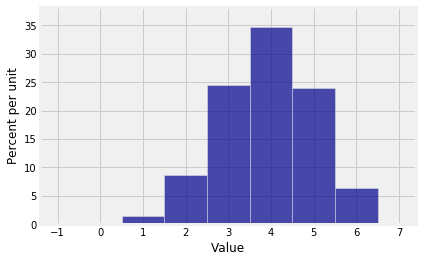

In [10]:
dist_S3 = Table().values(np.arange(7)).probability(probs_S3)
Plot(dist_S3)

### A Function to Calculate the Distribution of $S_n$ ###
We will combine the steps above to create a function `dist_sum` that takes as its arguments the number of terms $n$ and the probabilities in the distribution of $X_1$, and returns the distribution of the sum of $n$ i.i.d. copies of $X_1$.

Remember that $X_1$ must have a finite number of non-negative integer values.

In [11]:
def dist_sum(n, probs_0_through_N):
    """Return the distribution of S_n,
    the sum of n i.i.d. copies
    of a random variable with distribution probs_0_through_N
    on the integers 0, 1, 2, ..., N"""
    
    # Find the possible values of S_n
    N = len(probs_0_through_N) - 1   
    values_Sn = np.arange(n*N + 1)
    
    # Find the probailities of those values
    coeffs_X1 = np.flipud(probs_0_through_N)
    pgf_X1 = np.poly1d(coeffs_X1)
    pgf_Sn = pgf_X1 ** n
    coeffs_Sn = pgf_Sn.c
    probs_Sn = np.flipud(coeffs_Sn)
    
    t = Table().values(values_Sn).probability(probs_Sn)
    
    return t

### The Sum of the Numbers on $n$ Rolls of a Die ###
In Chapter 3 we found the exact distribution of the sum of five rolls of a die by listing all $6^5$ possible outcomes and computing the sum for each of them. That method gets intractable with larger numbers of rolls. Let's see if our new method can find the distribution of the total number of spots on 10 rolls of a die.

We have to start with the distribution of the number of spots on a single roll, for which it is important to remember to include 0 as the probability of 0 spots. Otherwise the pgf will be wrong because `NumPy` won't know that it is not supposed to include a term of degree 0.

In [12]:
die = np.append(0, (1/6)*np.ones(6))
die

array([0.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667])

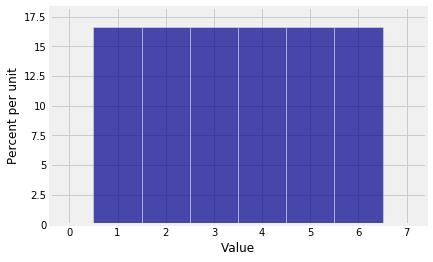

In [13]:
Plot(dist_sum(1, die))

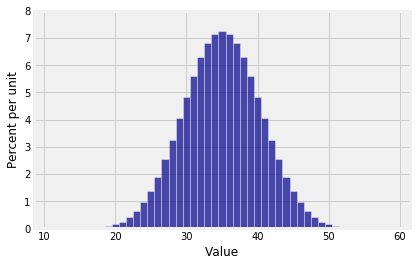

In [14]:
Plot(dist_sum(10, die))

### Making Waves ###
The distribution of the sum of 10 rolls of a die looks beautifully normal. Do all random sample sums have roughly normal distributions? 

To explore this question, let $X_1$ have the distribution given by $p_1 = p_2 = p_9 = 1/3$.

In [15]:
probs_X1 = make_array(0, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 1/3)

Here is the distribution of $X_1$.

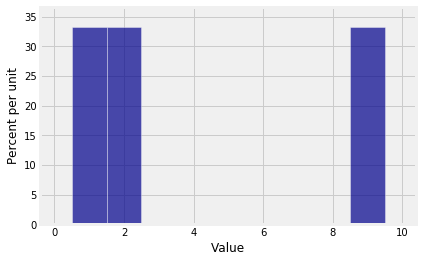

In [16]:
Plot(dist_sum(1, probs_X1))

The probability histogram of $S_{10}$ shows that sums don't always have smooth distributions.

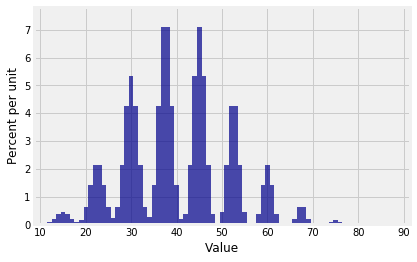

In [17]:
Plot(dist_sum(10, probs_X1))

The distribution of $S_{30}$ looks like a stegosaurus having a bad hair day.

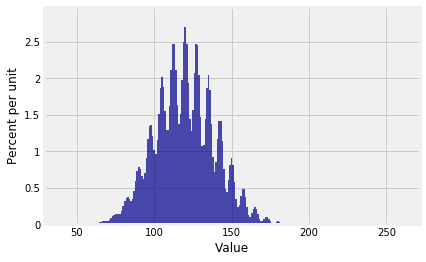

In [18]:
Plot(dist_sum(30, probs_X1))

And the distribution of $S_{100}$ is ...

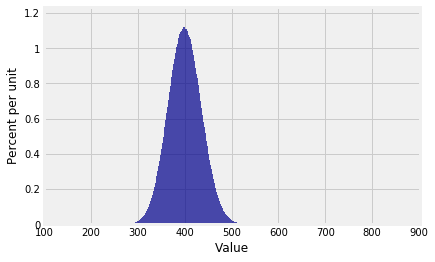

In [19]:
Plot(dist_sum(100, probs_X1))

... beautifully normal. 

It's begining to look as though there's a theorem here. In the rest of the chapter we will study that theorem, which about the approximate distribution of the sum of a large i.i.d. sample.

Keep in mind that our pgf method gives the *exact* distribution of the sum of an i.i.d. sample from a distribution on finitely many non-negative integers, provided `NumPy` can handle the calculations. In the example above, the pgf of $S_{100}$ is a polynomial of degree 900. `NumPy` handled it just fine.